# 学習状況のチェック (kait版)

In [1]:
TASK = 'handson001'

Datasetを表示する

推論の結果と合わせて表示する

In [2]:
import torch
import torchvision

MODEL = TASK+"_model.pth"

device = torch.device('cuda')
output_dim = 2

model = torchvision.models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(512, output_dim)

model = model.to(device)
model.load_state_dict(torch.load('data/'+TASK+'_A/'+MODEL))

<All keys matched successfully>

In [3]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import re
from utils import preprocess

DIR = "data/"
APEX = "apex"
CATEGORY = "A"

IMG_WIDTH = 224
IMG_HEIGHT = 224

# 読み込みを始める最初の数
start_pos = 0

path = DIR + TASK + "_" + CATEGORY + "/" + APEX
filenames = os.listdir(path)
#path = DIR + TASK + "_" + CATEGORY + "/" + APEX + '/*.jpg'
#filenames = glob.glob(path)

WIDTH = 8
HEIGHT = len(filenames) // WIDTH + 1

In [13]:
#print(len(filenames))
print(sorted(filenames))

['100_74_e0057992-8982-11ec-a80b-5c879c180f92.jpg', '104_76_c87d220c-8982-11ec-a80b-5c879c180f92.jpg', '112_68_f7d69f38-8982-11ec-a80b-5c879c180f92.jpg', '114_77_7e5807e6-8982-11ec-a80b-5c879c180f92.jpg', '121_75_d8a8f196-8983-11ec-a80b-5c879c180f92.jpg', '125_75_ee8bb6b6-8982-11ec-a80b-5c879c180f92.jpg', '128_74_a3dd0a0c-8982-11ec-a80b-5c879c180f92.jpg', '135_74_821270f6-8982-11ec-a80b-5c879c180f92.jpg', '145_72_84b678ac-8982-11ec-a80b-5c879c180f92.jpg', '146_73_b3ba8b84-8982-11ec-a80b-5c879c180f92.jpg', '148_72_e508917c-8982-11ec-a80b-5c879c180f92.jpg', '148_74_bfdd0c48-8982-11ec-a80b-5c879c180f92.jpg', '148_75_f4cb9e42-8982-11ec-a80b-5c879c180f92.jpg', '155_76_87af321a-8982-11ec-a80b-5c879c180f92.jpg', '158_74_d9dbf564-8982-11ec-a80b-5c879c180f92.jpg', '161_73_e2cfd582-8982-11ec-a80b-5c879c180f92.jpg', '162_73_b8fa618c-8982-11ec-a80b-5c879c180f92.jpg', '168_73_d5c8a85a-8982-11ec-a80b-5c879c180f92.jpg', '170_76_f14cad60-8982-11ec-a80b-5c879c180f92.jpg', '171_73_7211d778-8982-11ec-a80

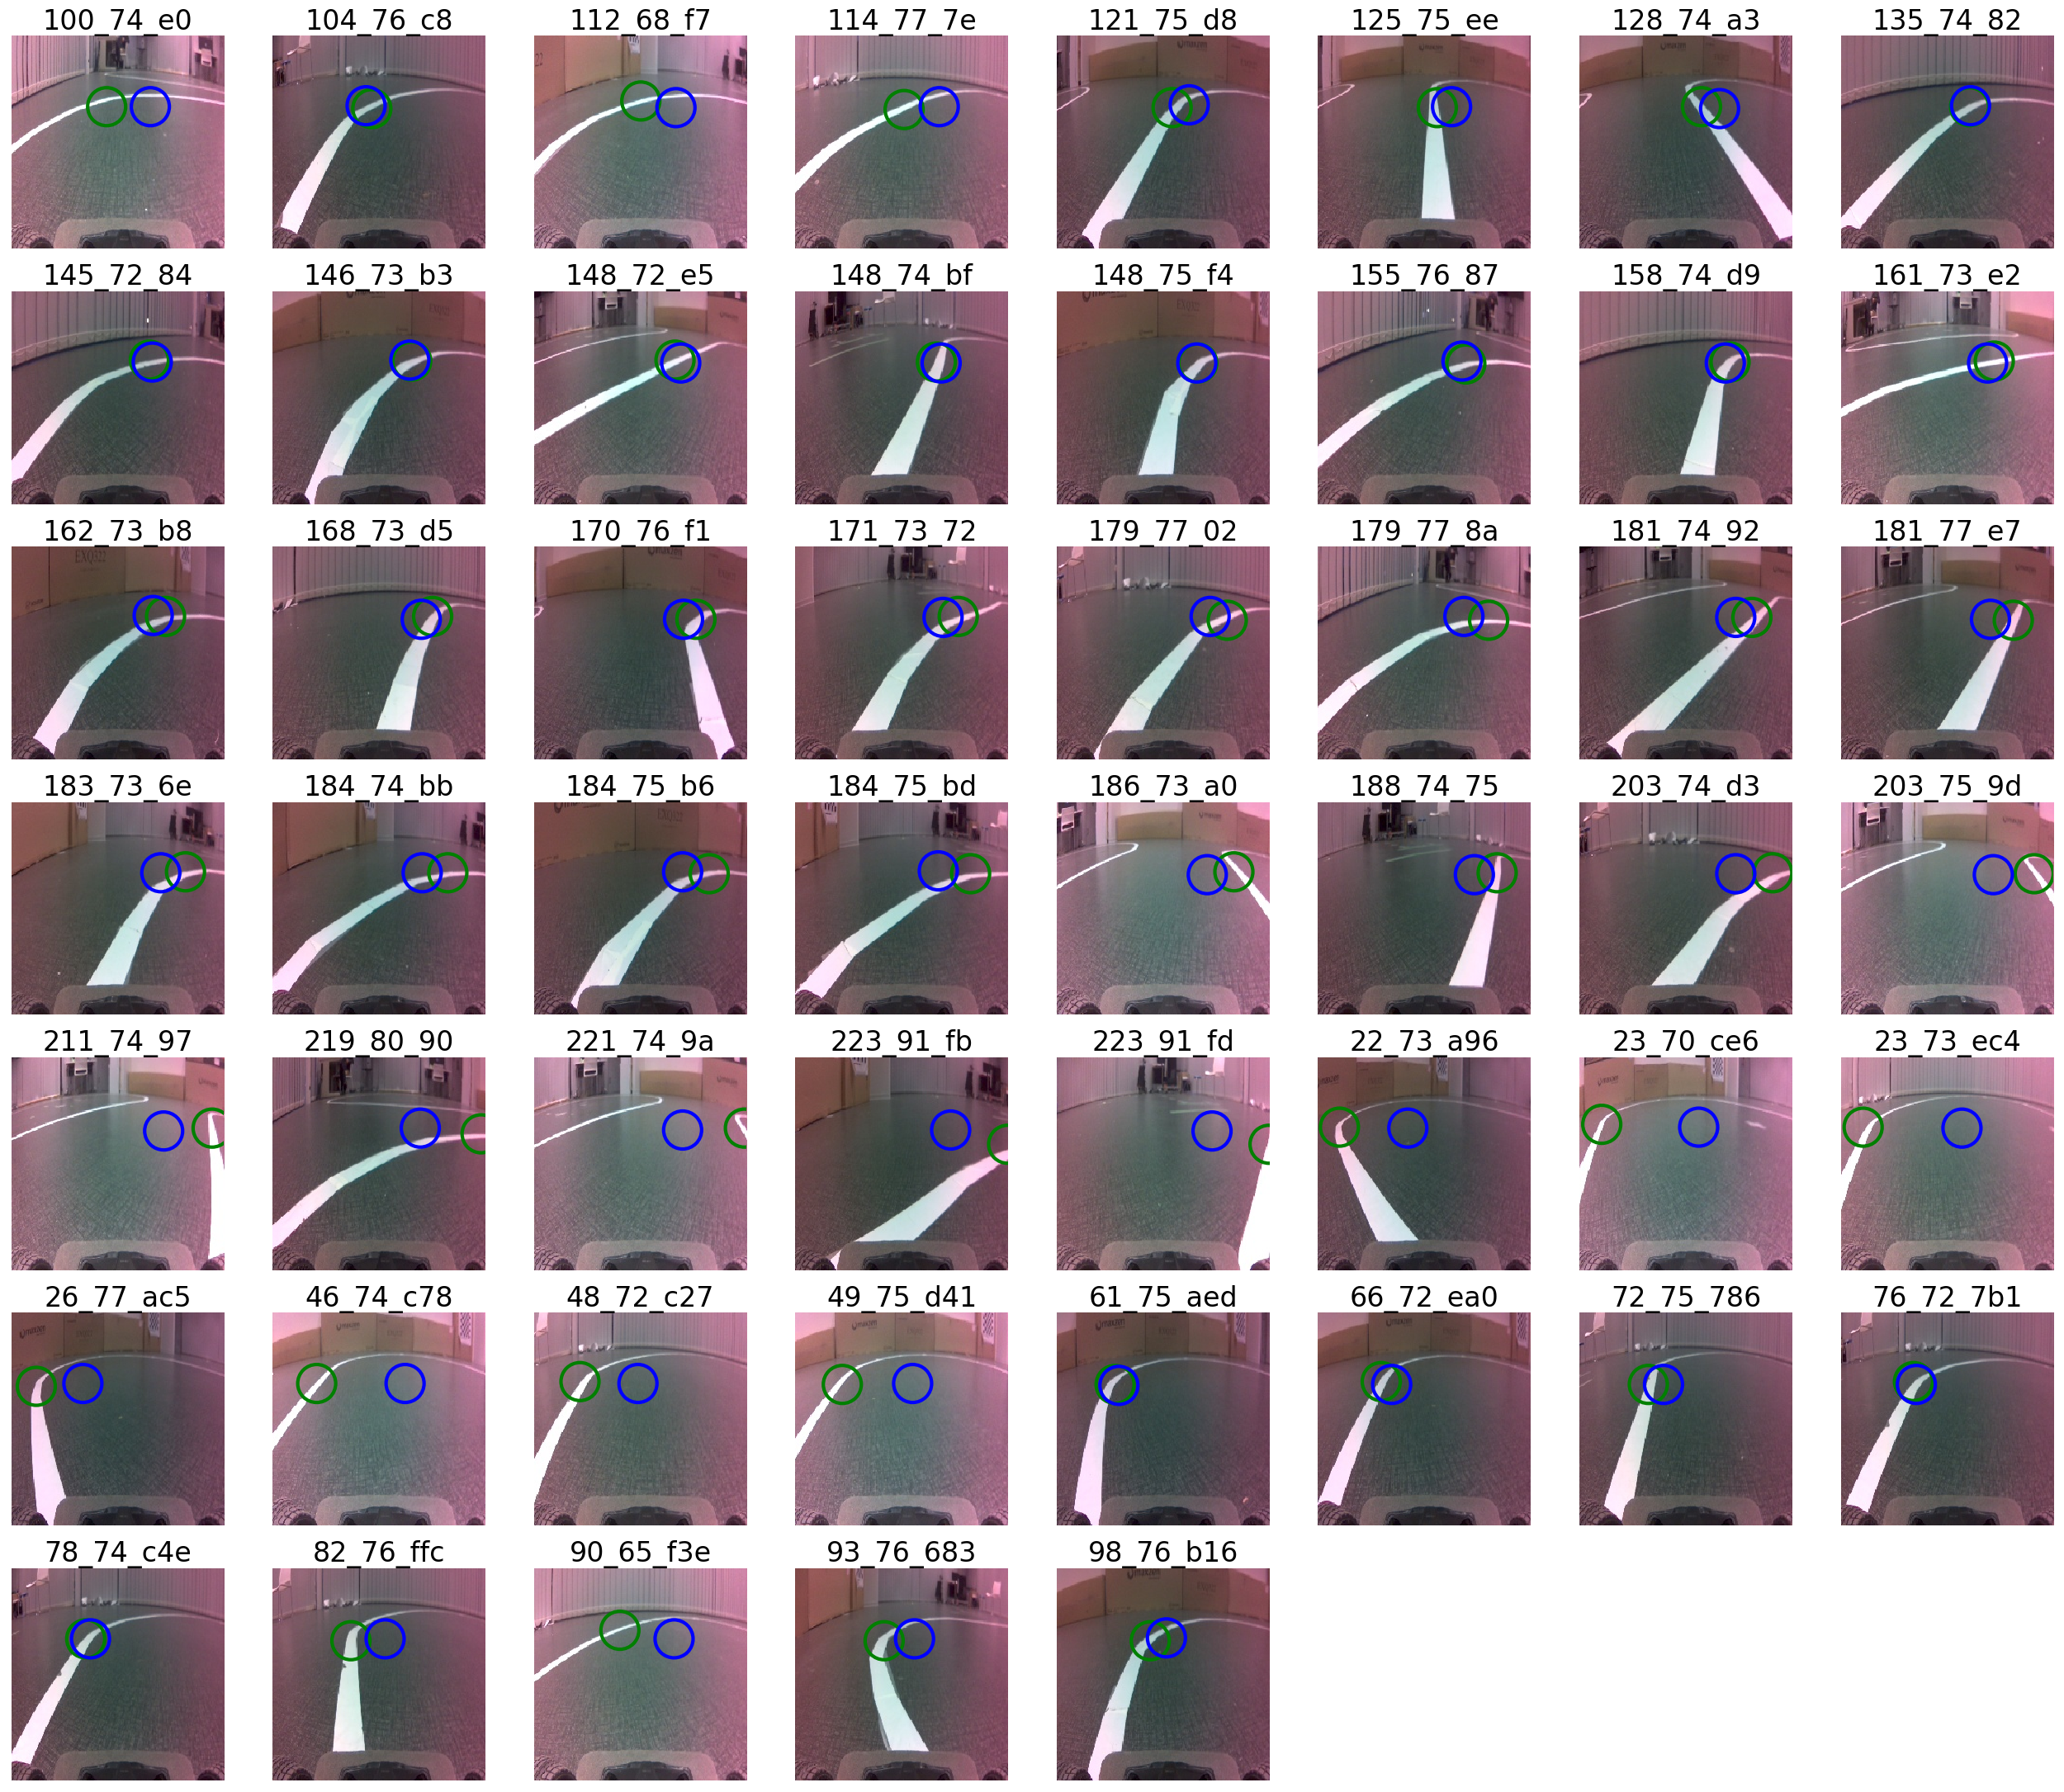

In [15]:
#plt.figure(figsize=(IMG_WIDTH/10, IMG_HEIGHT/10), dpi=100)
plt.figure(figsize=(IMG_WIDTH/HEIGHT, IMG_HEIGHT/WIDTH), dpi=100)

for i, name in enumerate(sorted(filenames)):
    if i >= start_pos:
        if i >= WIDTH * HEIGHT + start_pos:
            break
        pattern = '(\d+)_(\d+).*'
        result = re.match(pattern, name)
        
        
        if result:
            x = result.group(1)
            y = result.group(2)
        
        img = mpimg.imread(path + "/" + name)
        
        preprocessed = preprocess(img)
        output = model(preprocessed).detach().cpu().numpy().flatten()
        result_x = output[0]
        result_y = output[1]
        result_x = int(IMG_WIDTH * (result_x / 2.0 + 0.5))
        result_y = int(IMG_HEIGHT * (result_y / 2.0 + 0.5))
        
        plt.subplot(HEIGHT,WIDTH,(i-start_pos)+1)
        plt.tick_params(labelbottom=False,labelleft=False)
        plt.tick_params(bottom=False,left=False,right=False,top=False)
        ax = plt.gca() # get current axis
        
        ax.spines["right"].set_color("none") 
        ax.spines["left"].set_color("none") 
        ax.spines["top"].set_color("none")  
        ax.spines["bottom"].set_color("none") 
        c = patches.Circle(xy=(int(x), int(y)), linewidth=3, radius=20, ec='g',fill=False)
        r = patches.Circle(xy=(int(result_x), int(result_y)), linewidth=3, radius=20, ec='b',fill=False)
        ax.add_patch(c)
        ax.add_patch(r)
        
        plt.title(name[0:9],fontsize=24)
        plt.imshow(img)